In [91]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

In [92]:
df=pd.read_csv('Algerian_forest_fires_cleaned_dataset.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'Algerian_forest_fires_cleaned_dataset.csv'

In [ ]:
df.columns
## FWI is dependent here

In [ ]:
df.drop(['day' , 'month' , 'year'],axis =1 , inplace =True)

In [93]:
df

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,1
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,1
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,1
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,1


In [94]:
## Encoding of the categories in classes
df['Classes']=np.where(df['Classes'].str.contains('not fire'),0,1)

AttributeError: Can only use .str accessor with string values!

In [95]:
## features into independenty and depnedent 

X = df.drop('FWI' , axis =1)
Y = df['FWI']

In [96]:
from sklearn.model_selection import train_test_split
X_train , X_test , Y_train , Y_test = train_test_split(X, Y, test_size = 0.25 , random_state =42)

In [97]:
## feature selection based on correlation 

X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.656095,-0.305977,-0.317512,0.694768,0.498173,0.390684,0.629848,0.473609,0.542141,0.254549
RH,-0.656095,1.000000,0.225736,0.241656,-0.653023,-0.414601,-0.236078,-0.717804,-0.362317,-0.456876,-0.394665
Ws,-0.305977,0.225736,1.000000,0.251932,-0.190076,0.000379,0.096576,-0.023558,0.035633,-0.082570,-0.199969
Rain,-0.317512,0.241656,0.251932,1.000000,-0.545491,-0.289754,-0.302341,-0.345707,-0.300964,-0.369357,-0.059022
FFMC,0.694768,-0.653023,-0.190076,-0.545491,1.000000,0.620807,0.524101,0.750799,0.607210,0.781259,0.249514
DMC,0.498173,-0.414601,0.000379,-0.289754,0.620807,1.000000,0.868647,0.685656,0.983175,0.617273,0.212582
DC,0.390684,-0.236078,0.096576,-0.302341,0.524101,0.868647,1.000000,0.513701,0.942414,0.543581,-0.060838
ISI,0.629848,-0.717804,-0.023558,-0.345707,0.750799,0.685656,0.513701,1.000000,0.643818,0.742977,0.296441
BUI,0.473609,-0.362317,0.035633,-0.300964,0.607210,0.983175,0.942414,0.643818,1.000000,0.612239,0.114897
Classes,0.542141,-0.456876,-0.082570,-0.369357,0.781259,0.617273,0.543581,0.742977,0.612239,1.000000,0.188837


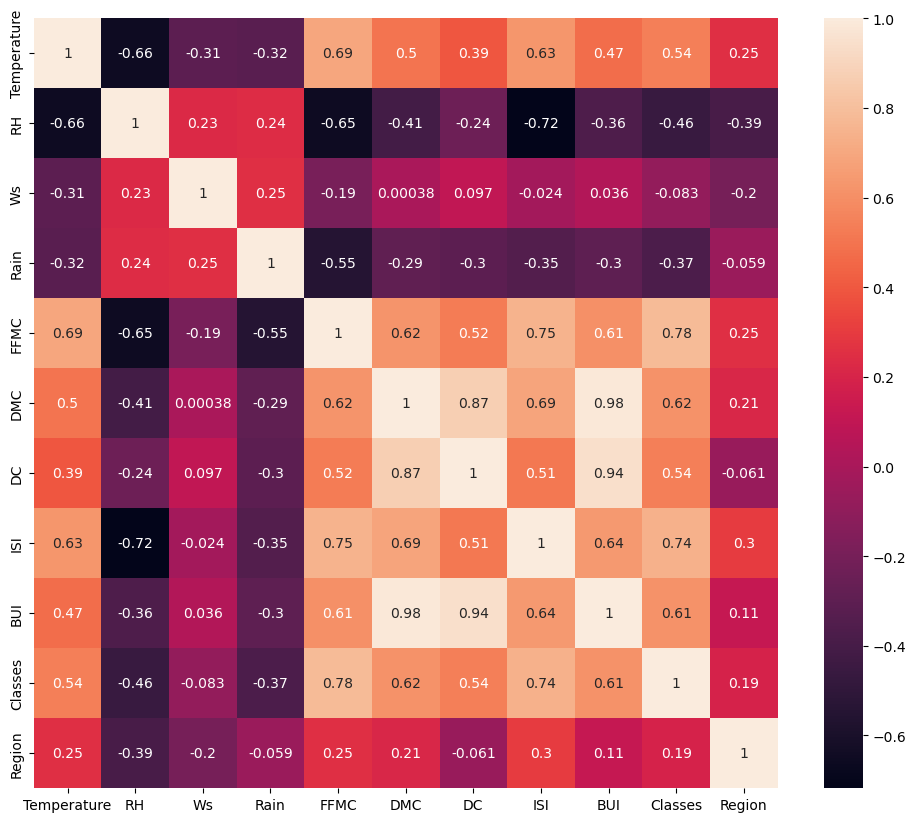

In [98]:
## check for mutlicollinerarity
plt.figure(figsize =(12 , 10))
corr = X_train.corr()
sns.heatmap(corr , annot = True)
plt.show()

In [99]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns to drop
    corr_matrix = dataset.corr()

    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            # If correlation value is above threshold
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    
    return col_corr


In [100]:
corr_features = correlation(X_train , 0.85) ## removing highly correlted datapoint is the task 
## learn its uses (overfitting) etc

In [101]:
## drop these
X_train.drop(corr_features , axis =1 , inplace = True)
X_test.drop(corr_features , axis =1 , inplace = True)

In [102]:
## feature scaling (standardization)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

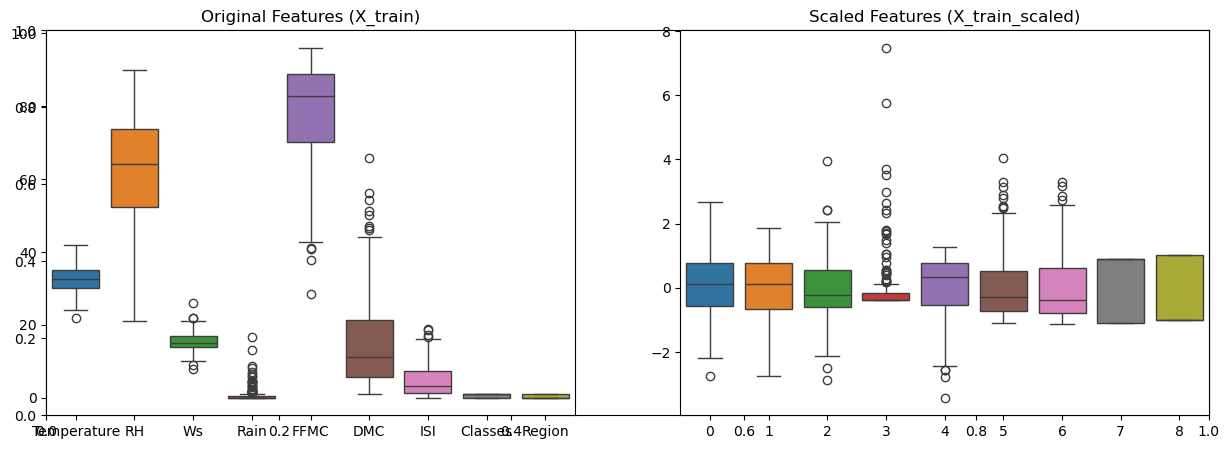

In [103]:
## BOX PLOTS

# Plot
plt.subplots(figsize=(15, 5))
plt.subplot(1,2,1)
sns.boxplot(data=X_train)
plt.title("Original Features (X_train)")
plt.subplot(1,2,2)
sns.boxplot(data=X_train_scaled,)
plt.title("Scaled Features (X_train_scaled)")
plt.show()

LINEAR EREGRESSION

In [104]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error , mean_squared_error
from sklearn.metrics import r2_score
regression = Lasso()
regression.fit(X_train_scaled, Y_train)
## regplot()
Y_predict = regression.predict(X_test_scaled)
mae = mean_absolute_error(Y_test , Y_predict)
mse = mean_squared_error(Y_test , Y_predict)
rmse = np.sqrt(mse)
print(mae , mse , rmse )
score = r2_score(Y_test , Y_predict)
print(score)

1.1331759949144087 2.248345891897476 1.499448529259166
0.9492020263112388


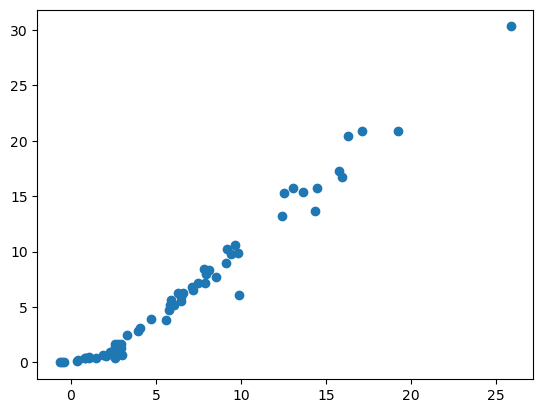

In [105]:
plt.scatter(Y_predict, Y_test)
plt.show()

In [106]:
## lasso regression
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error , mean_squared_error
from sklearn.metrics import r2_score
lassoregression = LinearRegression()
lassoregression.fit(X_train_scaled, Y_train)
## regplot()
Y_predict = lassoregression.predict(X_test_scaled)
mae = mean_absolute_error(Y_test , Y_predict)
mse = mean_squared_error(Y_test , Y_predict)
rmse = np.sqrt(mse)
print(mae , mse , rmse )
score = r2_score(Y_test , Y_predict)
print(score)

0.5468236465249995 0.6742766873791607 0.8211435242265268
0.9847657384266951


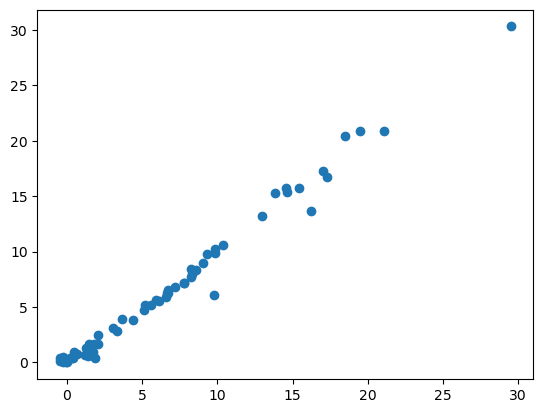

In [107]:
plt.scatter(Y_predict, Y_test)
plt.show()

In [108]:
## ridge regression
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error , mean_squared_error
from sklearn.metrics import r2_score
ridge = Ridge()
ridge.fit(X_train_scaled, Y_train)
## regplot()
Y_predict = ridge.predict(X_test_scaled)
mae = mean_absolute_error(Y_test , Y_predict)
mse = mean_squared_error(Y_test , Y_predict)
rmse = np.sqrt(mse)
print(mae , mse , rmse )
score = r2_score(Y_test , Y_predict)
print(score)

0.5642305340105677 0.694919891815204 0.8336185529456527
0.9842993364555515


In [109]:
## elasticnet regression
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error , mean_squared_error
from sklearn.metrics import r2_score
enregression = ElasticNet()
enregression.fit(X_train_scaled, Y_train)
## regplot()
Y_predict = enregression.predict(X_test_scaled)
mae = mean_absolute_error(Y_test , Y_predict)
mse = mean_squared_error(Y_test , Y_predict)
rmse = np.sqrt(mse)
print(mae , mse , rmse )
score = r2_score(Y_test , Y_predict)
print(score)

1.8822353634896005 5.517251101025226 2.348882947493388
0.8753460589519703


hyperparamter tunning

In [110]:
from sklearn.linear_model import LassoCV
lassocv = LassoCV(cv = 5) ## default (check kro kya hai
lassocv.fit(X_train_scaled  , Y_train)
lassocv.alpha_

np.float64(0.05725391318234408)

In [111]:
lassocv.alphas_

array([7.05853002, 6.58280872, 6.13914944, 5.72539132, 5.33951911,
       4.97965339, 4.64404142, 4.33104857, 4.03915039, 3.76692517,
       3.51304702, 3.27627941, 3.05546914, 2.84954075, 2.65749124,
       2.47838523, 2.31135036, 2.15557308, 2.01029467, 1.87480753,
       1.74845178, 1.63061198, 1.52071419, 1.41822315, 1.32263965,
       1.23349817, 1.15036452, 1.0728338 , 1.00052839, 0.93309613,
       0.87020857, 0.81155943, 0.75686304, 0.705853  , 0.65828087,
       0.61391494, 0.57253913, 0.53395191, 0.49796534, 0.46440414,
       0.43310486, 0.40391504, 0.37669252, 0.3513047 , 0.32762794,
       0.30554691, 0.28495408, 0.26574912, 0.24783852, 0.23113504,
       0.21555731, 0.20102947, 0.18748075, 0.17484518, 0.1630612 ,
       0.15207142, 0.14182231, 0.13226397, 0.12334982, 0.11503645,
       0.10728338, 0.10005284, 0.09330961, 0.08702086, 0.08115594,
       0.0756863 , 0.0705853 , 0.06582809, 0.06139149, 0.05725391,
       0.05339519, 0.04979653, 0.04644041, 0.04331049, 0.04039

In [112]:
lassocv.mse_path_

array([[53.64536329, 65.39074075, 54.89628985, 77.90299066, 39.38236846],
       [46.99139716, 59.81506814, 49.29840831, 75.6645852 , 35.31758355],
       [41.14908917, 53.9178721 , 42.49594889, 68.35708298, 31.76996123],
       [36.05788169, 48.41773965, 36.66879347, 61.92819453, 28.67296816],
       [31.62067285, 42.76466229, 31.68391904, 56.26841266, 24.93183295],
       [27.75285367, 37.81922812, 27.42599138, 51.28216115, 21.56888645],
       [24.3807738 , 33.49107651, 23.7950306 , 45.25481907, 18.66094162],
       [21.44052804, 29.70161639, 20.70460191, 39.90418045, 16.14837778],
       [18.876308  , 26.38208059, 18.07969934, 35.23429953, 13.97821475],
       [16.63960395, 23.47341883, 15.85530749, 31.15712074, 12.10483403],
       [14.68819307, 20.92329068, 13.97555108, 27.59649208, 10.48862803],
       [12.98525144, 18.68636627, 12.39173305, 24.48611006,  9.09521221],
       [11.49893734, 16.72312788, 11.06186319, 21.7677198 ,  7.89445038],
       [10.2013182 , 14.9991189 ,  9.9

In [113]:
## can seee teh plot too and r2 score 

## similarly i have the cv models from each regressiion model (default leave one)
## and elaticalso

In [116]:
## pickling the ridge and standard
import pickle 
pickle.dump(scaler , open('scaler.pkl', 'wb'))
pickle.dump(ridge , open('ridge.pkl', 'wb'))